In [401]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from copy import deepcopy
import pickle
from matplotlib.ticker import AutoMinorLocator
%pylab inline 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Populating the interactive namespace from numpy and matplotlib


C:\Users\laeti\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['copy', 'loads', 'f', 'load']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [402]:
from pickle import *

In [550]:
f = open("Xz","rb")
X = load(f)
f.close()

In [551]:
X.shape

(1560, 79)

# Séparer le jeu de données


In [552]:
y = X['TotalGHGEmissions']

In [553]:
X.drop(['TotalGHGEmissions','SiteEnergyUse(kBtu)'], axis = 1, inplace = True)

In [554]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state = 1)

In [555]:
energy_star_score_train = xtrain['ENERGYSTARScore']
energy_star_score_test = xtest['ENERGYSTARScore']
xtrain.drop(['ENERGYSTARScore'], axis=1 , inplace= True)
xtest.drop(['ENERGYSTARScore'], axis=1 , inplace= True)

C:\Users\laeti\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [556]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1092, 76)
(468, 76)
(1092,)
(468,)


In [410]:
ytrain

520      20.12
35      266.05
830      31.61
1246    588.25
575     284.01
         ...  
715      19.82
905      18.54
1096     12.22
235      78.92
1061     37.51
Name: TotalGHGEmissions, Length: 1092, dtype: float64

In [411]:
# Centrage et Réduction
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(xtrain)# Crée l'objet et calcule la moyenne et l'écart-type
xtrain_scaled = std_scale.transform(xtrain)# Transforme les données.

std_scale_test =std_scale.transform(xtest)



# Prédictions pour l'émission de CO2

In [412]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

selector = SelectKBest(score_func=f_regression , k=50)
selector.fit(xtrain, ytrain)



C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


SelectKBest(k=50, score_func=<function f_regression at 0x000001C60B5AEAF0>)

In [413]:
select_features_kbest = selector.get_support()
features = xtrain.columns[select_features_kbest]

## La régression linéaire. 

### Entraînement du modèle

In [440]:
model_regr = LinearRegression().fit(xtrain[features], ytrain)

### Évaluation du modèle de régression linéaire

Aide sur le site [https://ledatascientist.com/creer-un-modele-de-regression-lineaire-avec-python]

On utilise deux métriques pour l’évaluation L’erreur quadratique moyenne (l’erreur d’estimation) et le R-square (la qualité du modèle de régression)

In [441]:
# Création d'un dataFrame vide pour enregistrer les score r²
data_scores = pd.DataFrame(columns=['Modèle','Score'])

In [442]:
# Evaluation du training set
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
ytrain_pred = model_regr.predict(xtrain[features])
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = model_regr.predict(xtest[features])
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

liste = [ ('regression lineaire', r2 )]
data_scores_new = pd.DataFrame(liste, columns = ['Modèle' , 'Score'])
data_scores = data_scores.append(data_scores_new,ignore_index=True)
data_scores.head()

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 217.73151552278304
le score R2 est 0.5597394399131599


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 142.8599472521509
le score R2 est 0.3729952134025415


,Modèle,Score
0,regression lineaire,0.372995


Ridge

In [417]:
from sklearn.linear_model import Ridge

In [443]:
# define model
model = Ridge(alpha=0.1)
# fit model
model_ridge = model.fit(xtrain[features], ytrain)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.50838e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [444]:
ytrain_pred = model_ridge.predict(xtrain[features])
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = model_ridge.predict(xtest[features])
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

liste = [ ('Ridge', r2 )]
data_scores_new = pd.DataFrame(liste, columns = ['Modèle' , 'Score'])
data_scores = data_scores.append(data_scores_new,ignore_index=True)
data_scores.head()

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 217.76009843388812
le score R2 est 0.5596238410812187


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 142.70723695040994
le score R2 est 0.37433497189904996


,Modèle,Score
0,regression lineaire,0.372995
1,Ridge,0.374335


Lasso

In [445]:
from sklearn import linear_model
linear_model2 = linear_model.Lasso(alpha = 0.1)
model = linear_model2.fit(xtrain[features], ytrain)

In [446]:
ytrain_pred = model.predict(xtrain[features])
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = model.predict(xtest[features])
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

liste = [ ('Lasso', r2 )]
data_scores_new = pd.DataFrame(liste, columns = ['Modèle' , 'Score'])
data_scores = data_scores.append(data_scores_new,ignore_index=True)
data_scores.head()

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 217.76532329083102
le score R2 est 0.559602708375535


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 141.80691991122484
le score R2 est 0.382204509882237


,Modèle,Score
0,regression lineaire,0.372995
1,Ridge,0.374335
2,Lasso,0.382205


Elastic net

In [447]:
#Elastic Net
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha = 0.001)
model_elastic = model.fit(xtrain[features], ytrain)

pred_train= model_elastic.predict(xtrain[features])
print('L`erreur quadratique pour le modèle d`entrainement est :' )
print(np.sqrt(mean_squared_error(ytrain, pred_train)))
print('Le R2 est :' )
print(r2_score(ytrain, pred_train))


pred_test= model_elastic.predict(xtest[features])
print('------------------------------------------------' )
print('L`erreur quadratique pour le modèle test est :' )
print(np.sqrt(mean_squared_error(ytest, pred_test)))
print('Le R2 est :' )
print(r2_score(ytest, pred_test))


L`erreur quadratique pour le modèle d`entrainement est :
218.40013404896615
Le R2 est :
0.5570313492443457
------------------------------------------------
L`erreur quadratique pour le modèle test est :
142.23602303872957
Le R2 est :
0.3784599949310319


Essayons d'améliorer le modèle elastic net. 


In [423]:
from sklearn.model_selection import GridSearchCV
param_alpha={'alpha':[0.001, 0.002, 0.003, 0.005, 0.01, 0.02]}
model = GridSearchCV(estimator =model_elastic, param_grid = param_alpha, scoring = 'r2', cv=5)
model.fit(xtrain[features], ytrain)
print(pd.DataFrame(model.cv_results_).loc[:,['params','mean_test_score']])
print(model.best_params_)
print(model.best_score_)

             params  mean_test_score
0  {'alpha': 0.001}         0.409111
1  {'alpha': 0.002}         0.414695
2  {'alpha': 0.003}         0.416859
3  {'alpha': 0.005}         0.416722
4   {'alpha': 0.01}         0.409983
5   {'alpha': 0.02}         0.397774
{'alpha': 0.003}
0.4168585313970915


Le meilleur modèle ici est Elastic Net avec alpha = 0.003 

In [448]:
model = ElasticNet(alpha = 0.003)
model_elastic = model.fit(xtrain[features], ytrain)

pred_train= model_elastic.predict(xtrain[features])
print('L`erreur quadratique pour le modèle d`entrainement est :' )
print(np.sqrt(mean_squared_error(ytrain, pred_train)))
print('Le R2 est :' )
print(r2_score(ytrain, pred_train))


pred_test= model_elastic.predict(xtest[features])
print('------------------------------------------------' )
print('L`erreur quadratique pour le modèle test est :' )
print(np.sqrt(mean_squared_error(ytest, pred_test)))
print('Le R2 est :' )
print(r2_score(ytest, pred_test))


liste = [ ('Elastic Net', r2_score(ytest, pred_test))]
data_scores_new = pd.DataFrame(liste, columns = ['Modèle' , 'Score'])
data_scores = data_scores.append(data_scores_new,ignore_index=True)
data_scores.head()

L`erreur quadratique pour le modèle d`entrainement est :
221.42308260108527
Le R2 est :
0.5446839327662976
------------------------------------------------
L`erreur quadratique pour le modèle test est :
141.68077936765818
Le R2 est :
0.38330310787918587


,Modèle,Score
0,regression lineaire,0.372995
1,Ridge,0.374335
2,Lasso,0.382205
3,Elastic Net,0.383303


Amélioration avec log

In [449]:
model = ElasticNet(alpha = 0.003)
model_elastic = model.fit(xtrain[features], np.log(ytrain + 1))

# model evaluation for training set
ytrain_pred = np.exp(model_elastic.predict(xtrain[features]))-1
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = np.exp(model_elastic.predict(xtest[features]))-1
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 968.5534849069955
le score R2 est -7.7119305956453985


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 195.07186753625516
le score R2 est -0.16906637364388732


Il n'y a pas d'amélioration de l'Elastic Net avec le log. 

## SVR 

In [450]:
#from sklearn import svm
from sklearn.svm import SVR
#epsilon définit la largeur du tube autour de l'hyperplan. C est le paramètre de régularisation.
regressor = SVR(kernel='rbf', C=1, epsilon = 10)
model_baseline = regressor.fit(xtrain[features], ytrain)

In [451]:
# Evaluation du training set

ytrain_pred = model_baseline.predict(xtrain[features])
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = model_baseline.predict(xtest[features])
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 334.54550929308766
le score R2 est -0.039387764158812955


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 181.68468801362934
le score R2 est -0.014113444433135447


Augmentons l'hyperparamètre C

In [458]:
regressor = SVR(kernel='rbf', C=1000, epsilon = 10)
model_baseline = regressor.fit(xtrain[features], ytrain)

In [459]:
# Evaluation du training set

ytrain_pred = model_baseline.predict(xtrain[features])
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = model_baseline.predict(xtest[features])
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))


liste = [ ('SVR', r2 )]
data_scores_new = pd.DataFrame(liste, columns = ['Modèle' , 'Score'])
data_scores = data_scores.append(data_scores_new,ignore_index=True)
data_scores.head()

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 288.16076296069804
le score R2 est 0.22885351833938627


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 140.98088493016425
le score R2 est 0.3893809489431094


,Modèle,Score
0,regression lineaire,0.372995
1,Ridge,0.374335
2,Lasso,0.382205
3,Elastic Net,0.383303
4,SVR,0.389381


Les hyperparamètres

In [454]:
param_C={
         'C':[1000, 2000, 5000, 6500, 8000, 10000],
         'epsilon':[10, 20, 50, 65, 80, 100]
        }

In [455]:
model = GridSearchCV(estimator = model_baseline, param_grid = param_C, scoring = 'r2', cv=5)
model.fit(xtrain[features], ytrain)
print(pd.DataFrame(model.cv_results_).loc[:,['params','mean_test_score']])
print(model.best_params_)
print(model.best_score_)

                          params  mean_test_score
0     {'C': 1000, 'epsilon': 10}         0.230709
1     {'C': 1000, 'epsilon': 20}         0.231997
2     {'C': 1000, 'epsilon': 50}         0.239171
3     {'C': 1000, 'epsilon': 65}         0.240398
4     {'C': 1000, 'epsilon': 80}         0.241172
5    {'C': 1000, 'epsilon': 100}         0.240076
6     {'C': 2000, 'epsilon': 10}         0.237788
7     {'C': 2000, 'epsilon': 20}         0.238612
8     {'C': 2000, 'epsilon': 50}         0.244571
9     {'C': 2000, 'epsilon': 65}         0.246798
10    {'C': 2000, 'epsilon': 80}         0.248002
11   {'C': 2000, 'epsilon': 100}         0.245072
12    {'C': 5000, 'epsilon': 10}         0.239263
13    {'C': 5000, 'epsilon': 20}         0.241414
14    {'C': 5000, 'epsilon': 50}         0.247285
15    {'C': 5000, 'epsilon': 65}         0.251000
16    {'C': 5000, 'epsilon': 80}         0.252533
17   {'C': 5000, 'epsilon': 100}         0.249392
18    {'C': 6500, 'epsilon': 10}         0.240257


Le meilleur modèle est C = 10000 et epsilon = 80

In [456]:
regressor = SVR(kernel='rbf', C=10000, epsilon = 80)
model_baseline = regressor.fit(xtrain[features], ytrain)

In [457]:
# Evaluation du training set

ytrain_pred = model_baseline.predict(xtrain[features])
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = model_baseline.predict(xtest[features])
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))


La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 284.46299017004554
le score R2 est 0.24851774051060227


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 142.59095235942246
le score R2 est 0.37535419925228153


Amélioration avec le log. 

In [460]:
regressor = SVR(kernel='rbf', C=10000, epsilon = 80)
model_baseline = regressor.fit(xtrain[features], np.log(ytrain + 1))

In [461]:
# Evaluation du training set

ytrain_pred = np.exp(model_baseline.predict(xtrain[features]))-1
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = np.exp(model_baseline.predict(xtest[features]))-1
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 346.4939394544364
le score R2 est -0.11495791847813153


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 196.4641775634259
le score R2 est -0.1858141667030322


Le log n'améliore pas le modèle

Visualiser les résultats de la régression du vecteur de support

In [462]:
xtrain[features].columns

Index(['YearBuilt', 'NumberofFloors', 'SteamUse(kBtu)',
       'Total_ListOfAllPropertyUseTypes', 'ration_GFA_Parking',
       'ration_GFA_Buildings', 'GFA_by_Buildings', 'GFA_by_Floor', 'bd_Campus',
       'bd_NonResidential', 'bd_SPS-District K-12', 'pmt_Distribution Center',
       'pmt_Hospital', 'pmt_Hotel', 'pmt_K-12 School', 'pmt_Laboratory',
       'pmt_Large Office', 'pmt_Medical Office', 'pmt_Other',
       'pmt_Retail Store', 'pmt_Self-Storage Facility',
       'pmt_Senior Care Community', 'pmt_Small- and Mid-Sized Office',
       'pmt_Supermarket / Grocery Store', 'pmt_University', 'pmt_Warehouse',
       'pmt_Worship Facility', 'nb_CENTRAL', 'nb_DOWNTOWN', 'nb_EAST',
       'nb_GREATER DUWAMISH', 'nb_LAKE UNION', 'nb_NORTH',
       'ThirdLargestPropertyUseType_0', 'ThirdLargestPropertyUseType_1',
       'ThirdLargestPropertyUseType_2', 'ThirdLargestPropertyUseType_3',
       'ThirdLargestPropertyUseType_4', 'ThirdLargestPropertyUseType_6',
       'ThirdLargestPropertyUseTy

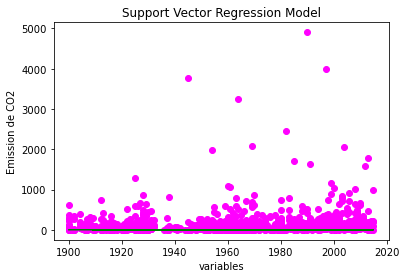

In [463]:
plt.scatter(xtrain[features]['YearBuilt'], ytrain, color = 'magenta') 
plt.plot(xtrain[features]['YearBuilt'], regressor.predict(xtrain[features]), color = 'green') 
plt.title('Support Vector Regression Model') 
plt .xlabel('variables') 
plt.ylabel('Emission de CO2') 
plt.show()

## Decision tree

[Source :https://data36.com/regression-tree-python-scikit-learn/]

In [283]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 

In [464]:
# create a regressor object
model = DecisionTreeRegressor(random_state = 44)

# fit the regressor with X and Y data
model_baseline = model.fit(xtrain[features], ytrain)

predictions = model.predict(xtest[features])

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

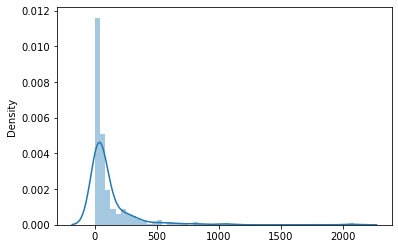

In [465]:
# checking difference between labled y and predicted y
sns.distplot(predictions)

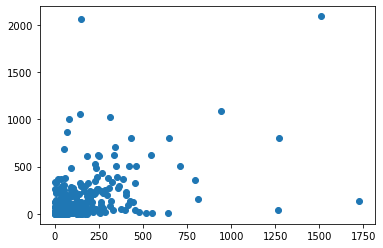

In [466]:
plt.scatter(ytest,predictions)

In [467]:
# Evaluation du training set

ytrain_pred = model_baseline.predict(xtrain[features])
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = model_baseline.predict(xtest[features])
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 0.1375892983422585
le score R2 est 0.9999998241928626


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 197.8754787458236
le score R2 est -0.20291195929103978


Les hyperparamètres

In [468]:
parameters_2={"max_depth" : [1,3,5,7,9,11,12,14,None],
             "min_samples_split":[1,3,10,20]
            }

In [469]:
model = GridSearchCV(estimator =model_baseline, param_grid = parameters_2, scoring = 'r2', cv=5)
model.fit(xtrain[features], ytrain)
print(pd.DataFrame(model.cv_results_).loc[:,['params','mean_test_score']])
print(model.best_params_)
print(model.best_score_)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The 

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The 

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The 

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The 

                                          params  mean_test_score
0       {'max_depth': 1, 'min_samples_split': 1}              NaN
1       {'max_depth': 1, 'min_samples_split': 3}         0.000367
2      {'max_depth': 1, 'min_samples_split': 10}         0.000367
3      {'max_depth': 1, 'min_samples_split': 20}         0.000367
4       {'max_depth': 3, 'min_samples_split': 1}              NaN
5       {'max_depth': 3, 'min_samples_split': 3}         0.125523
6      {'max_depth': 3, 'min_samples_split': 10}         0.093067
7      {'max_depth': 3, 'min_samples_split': 20}         0.093067
8       {'max_depth': 5, 'min_samples_split': 1}              NaN
9       {'max_depth': 5, 'min_samples_split': 3}         0.324440
10     {'max_depth': 5, 'min_samples_split': 10}         0.295123
11     {'max_depth': 5, 'min_samples_split': 20}         0.295123
12      {'max_depth': 7, 'min_samples_split': 1}              NaN
13      {'max_depth': 7, 'min_samples_split': 3}         0.428920
14     {'m

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [           nan 3.66911729e-04 3.66911729e-04 3.66911729e-04
            nan 1.25523084e-01 9.30669520e-02 9.30669520e-02
            nan 3.24440344e-01 2.95122905e-01 2.95122905e-01
            nan 4.28919529e-01 3.82659449e-01 3.81555033e-01
            nan 4.42217756e-01 3.95306840e-01 4.06046115e-01
            nan 3.74858000e-01 3.92744213e-01 4.09146082e-01
            nan 3.77531371e-01 3.89319254e-01 4.03842763e-01
            nan 4.14334548e-01 3.78899264e-01 3.99858161e-01
            nan 3.25650463e-01 3.62393610e-01 3.90332575e-01]
  warnings.warn(


Le meilleur modèle est  celui qui a pour paramètre max_depth = 9 et  min_samples_split = 3

In [474]:
# create a regressor object
model = DecisionTreeRegressor(random_state = 44, max_depth = 9, min_samples_split = 3)

# fit the regressor with X and Y data
model_baseline = model.fit(xtrain[features], ytrain)

In [475]:
# Evaluation du training set

ytrain_pred = model_baseline.predict(xtrain[features])
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = model_baseline.predict(xtest[features])
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

liste = [ ('Decision tree', r2 )]
data_scores_new = pd.DataFrame(liste, columns = ['Modèle' , 'Score'])
data_scores = data_scores.append(data_scores_new,ignore_index=True)
data_scores.head(10)



La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 123.73868866564725
le score R2 est 0.8578070025823523


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 151.93024549073002
le score R2 est 0.2908495798074612


,Modèle,Score
0,regression lineaire,0.372995
1,Ridge,0.374335
2,Lasso,0.382205
3,Elastic Net,0.383303
4,SVR,0.389381
5,Decision tree,0.290850


Amélioration du modèle avec le log

In [472]:
# create a regressor object
model = DecisionTreeRegressor(random_state = 44, max_depth = 9, min_samples_split = 3)

# fit the regressor with X and Y data
model_baseline = model.fit(xtrain[features], np.log(ytrain+1))

In [473]:
# Evaluation du training set

ytrain_pred = np.exp(model_baseline.predict(xtrain[features]))-1
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = np.exp(model_baseline.predict(xtest[features]))-1
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 103.93344649027749
le score R2 est 0.8996822348064547


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 212.3587370543322
le score R2 est -0.38544775439093626


Le log n'améliore pas le modèle. 

## Random Forest

In [476]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr_baseline_1 = regr.fit(xtrain[features], ytrain)

In [477]:
# Evaluation du training set

ytrain_pred = regr_baseline_1.predict(xtrain[features])
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = regr_baseline_1.predict(xtest[features])
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 234.43564770915526
le score R2 est 0.4895955043531989


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 156.83285772091926
le score R2 est 0.24434423948736927


Amélioration du modèle

In [478]:
params_random_forest = {'n_estimators':[14,50,100],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [1,3,5,7,9,11,12,14,None],
               'min_samples_split': [1,3,10,20],
               }

In [479]:
model = GridSearchCV(estimator =regr_baseline_1, param_grid = params_random_forest, scoring = 'r2', cv=5)
model.fit(xtrain[features], ytrain)
print(pd.DataFrame(model.cv_results_).loc[:,['params','mean_test_score']])
print(model.best_params_)
print(model.best_score_)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

                                                params  mean_test_score
0    {'max_depth': 1, 'max_features': 'auto', 'min_...              NaN
1    {'max_depth': 1, 'max_features': 'auto', 'min_...              NaN
2    {'max_depth': 1, 'max_features': 'auto', 'min_...              NaN
3    {'max_depth': 1, 'max_features': 'auto', 'min_...         0.132929
4    {'max_depth': 1, 'max_features': 'auto', 'min_...         0.108689
..                                                 ...              ...
211  {'max_depth': None, 'max_features': 'sqrt', 'm...         0.399509
212  {'max_depth': None, 'max_features': 'sqrt', 'm...         0.420663
213  {'max_depth': None, 'max_features': 'sqrt', 'm...         0.346932
214  {'max_depth': None, 'max_features': 'sqrt', 'm...         0.374531
215  {'max_depth': None, 'max_features': 'sqrt', 'm...         0.398274

[216 rows x 2 columns]
{'max_depth': 14, 'max_features': 'auto', 'min_samples_split': 3, 'n_estimators': 100}
0.48235839699939875


Le meilleur modèle est celui dont les hyperparamètres sont : 'max_depth': 14, 'max_features': 'auto', 'min_samples_split': 3, 'n_estimators': 100

In [484]:
regr = RandomForestRegressor(max_depth = 14, max_features = 'auto', min_samples_split= 3, n_estimators= 100, random_state=0)
regr_baseline_1 = regr.fit(xtrain[features], ytrain)
RandomForestRegressor(...)

RandomForestRegressor(n_estimators=Ellipsis)

In [485]:
ytrain_pred = regr_baseline_1.predict(xtrain[features])
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = regr_baseline_1.predict(xtest[features])
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))


liste = [('Random forest', r2 )]
data_scores_new = pd.DataFrame(liste, columns = ['Modèle' , 'Score'])
data_scores = data_scores.append(data_scores_new,ignore_index=True)
data_scores.head(10)

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 110.05540208305678
le score R2 est 0.8875162153221332


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 124.8536144223841
le score R2 est 0.5210919643567273


,Modèle,Score
0,regression lineaire,0.372995
1,Ridge,0.374335
2,Lasso,0.382205
3,Elastic Net,0.383303
4,SVR,0.389381
5,Decision tree,0.290850
6,Random forest,0.521092


Amélioration avec le log

In [482]:
regr = RandomForestRegressor(max_depth = 14, max_features = 'auto', min_samples_split= 3, n_estimators= 100, random_state=0)
regr_baseline_1 = regr.fit(xtrain[features], np.log(ytrain+1))

In [483]:
ytrain_pred = np.exp(regr_baseline_1.predict(xtrain[features]))-1
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = np.exp(regr_baseline_1.predict(xtest[features]))-1
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))



La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 196.74538284653784
le score R2 est 0.6405187118028075


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 132.676820115938
le score R2 est 0.4591958772207021


Le log n'améliore pas le modèle

## Régression Gradient Boosting 

In [486]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
reg = ensemble.GradientBoostingRegressor()
reg_baseline = reg.fit(xtrain[features], ytrain)

In [487]:
# Evaluation du training set

ytrain_pred = reg_baseline.predict(xtrain[features])
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = reg_baseline.predict(xtest[features])
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 94.09221392351877
le score R2 est 0.917780550364918


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 127.26812826109601
le score R2 est 0.5023898854663593


Validation croisée

In [488]:
params_2 = { "random_state":[0, 1, 3, 5],
             "max_depth": [4,6, 8, 10],
             "min_samples_split": [5,10, 15, 30]
      
        }

In [489]:
model = GridSearchCV(estimator =reg_baseline, param_grid = params_2, scoring = 'r2', cv=5)
model.fit(xtrain[features], ytrain)
print(pd.DataFrame(model.cv_results_).loc[:,['params','mean_test_score']])
print(model.best_params_)
print(model.best_score_)

                                               params  mean_test_score
0   {'max_depth': 4, 'min_samples_split': 5, 'rand...         0.487871
1   {'max_depth': 4, 'min_samples_split': 5, 'rand...         0.490254
2   {'max_depth': 4, 'min_samples_split': 5, 'rand...         0.473771
3   {'max_depth': 4, 'min_samples_split': 5, 'rand...         0.493744
4   {'max_depth': 4, 'min_samples_split': 10, 'ran...         0.476034
..                                                ...              ...
59  {'max_depth': 10, 'min_samples_split': 15, 'ra...         0.493394
60  {'max_depth': 10, 'min_samples_split': 30, 'ra...         0.474614
61  {'max_depth': 10, 'min_samples_split': 30, 'ra...         0.477069
62  {'max_depth': 10, 'min_samples_split': 30, 'ra...         0.475062
63  {'max_depth': 10, 'min_samples_split': 30, 'ra...         0.474223

[64 rows x 2 columns]
{'max_depth': 8, 'min_samples_split': 15, 'random_state': 0}
0.5189768414204717


Les meilleurs hyperparamètres sont : 'max_depth': 8 et  'min_samples_split': 15 et on met random_state à 0

In [490]:
reg = ensemble.GradientBoostingRegressor(max_depth= 8, min_samples_split = 15, random_state =  0)
reg_baseline = reg.fit(xtrain[features], ytrain)

In [491]:
# Evaluation du training set

ytrain_pred = reg_baseline.predict(xtrain[features])
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = reg_baseline.predict(xtest[features])
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))



La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 40.92992321242125
le score R2 est 0.9844421689661869


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 133.5950338865141
le score R2 est 0.4516845107836891


 On va voir si le log l'améliore

In [492]:
reg = ensemble.GradientBoostingRegressor(max_depth= 8, min_samples_split = 15, random_state =  0)
reg_baseline = reg.fit(xtrain[features], np.log(ytrain+1))

In [494]:
# Evaluation du training set

ytrain_pred = np.exp(reg_baseline.predict(xtrain[features]))-1
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = np.exp(reg_baseline.predict(xtest[features]))-1
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

liste = [('Regression Gradient Boosting', r2 )]
data_scores_new = pd.DataFrame(liste, columns = ['Modèle' , 'Score'])
data_scores = data_scores.append(data_scores_new,ignore_index=True)
data_scores.head(10)


La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 91.21707573075395
le score R2 est 0.9227284753397276


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 125.69620821550158
le score R2 est 0.5146061839459333


,Modèle,Score
0,regression lineaire,0.372995
1,Ridge,0.374335
2,Lasso,0.382205
3,Elastic Net,0.383303
4,SVR,0.389381
5,Decision tree,0.290850
6,Random forest,0.521092
7,Regression Gradient Boosting,0.514606


Le log améliore le modèle.

## Adaboost regression

In [495]:
from sklearn.ensemble import AdaBoostRegressor

regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr_baseline = regr.fit(xtrain[features], ytrain)

In [496]:
# Evaluation du training set

ytrain_pred = regr_baseline.predict(xtrain[features])
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = regr_baseline.predict(xtest[features])
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 629.9463979757074
le score R2 est -2.6853130474447258


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 635.7095276625248
le score R2 est -11.415588966574516


Validation croisée

In [497]:
parametres_adaboost ={'n_estimators':[500,1000,2000],'learning_rate':[0.001,0.01,.1],'random_state':[1]}

In [498]:
model = GridSearchCV(estimator =regr_baseline, param_grid = parametres_adaboost, scoring = 'r2', cv=5)
model.fit(xtrain[features], ytrain)
print(pd.DataFrame(model.cv_results_).loc[:,['params','mean_test_score']])
print(model.best_params_)
print(model.best_score_)

                                              params  mean_test_score
0  {'learning_rate': 0.001, 'n_estimators': 500, ...         0.227861
1  {'learning_rate': 0.001, 'n_estimators': 1000,...         0.243092
2  {'learning_rate': 0.001, 'n_estimators': 2000,...         0.249788
3  {'learning_rate': 0.01, 'n_estimators': 500, '...         0.237521
4  {'learning_rate': 0.01, 'n_estimators': 1000, ...         0.258780
5  {'learning_rate': 0.01, 'n_estimators': 2000, ...         0.210623
6  {'learning_rate': 0.1, 'n_estimators': 500, 'r...         0.113556
7  {'learning_rate': 0.1, 'n_estimators': 1000, '...         0.113556
8  {'learning_rate': 0.1, 'n_estimators': 2000, '...         0.113556
{'learning_rate': 0.01, 'n_estimators': 1000, 'random_state': 1}
0.25877988918676803


Les meilleurs hyperparamètres sont : 'learning_rate': 0.01, 'n_estimators': 1000 et on met 'random_state' à 1

In [499]:
regr = AdaBoostRegressor(random_state=1, n_estimators=1000,learning_rate = 0.01)
regr_baseline = regr.fit(xtrain[features], ytrain)

In [500]:
# Evaluation du training set

ytrain_pred = regr_baseline.predict(xtrain[features])
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = regr_baseline.predict(xtest[features])
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))




La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 176.03759256265857
le score R2 est 0.7122084540941078


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 172.22633991388776
le score R2 est 0.08872589406909415


Amélioration avec le log

In [501]:
regr = AdaBoostRegressor(random_state=1, n_estimators=1000,learning_rate = 0.01)
regr_baseline = regr.fit(xtrain[features], np.log(ytrain+1))

In [503]:
# Evaluation du training set

ytrain_pred = np.exp(regr_baseline.predict(xtrain[features]))-1
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = np.exp(regr_baseline.predict(xtest[features]))-1
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

liste = [('Adaboost regression', r2 )]
data_scores_new = pd.DataFrame(liste, columns = ['Modèle' , 'Score'])
data_scores = data_scores.append(data_scores_new,ignore_index=True)
data_scores.head(10)

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 311.73366949753586
le score R2 est 0.09752617575731626


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 163.89090230147883
le score R2 est 0.17479931861704812


,Modèle,Score
0,regression lineaire,0.372995
1,Ridge,0.374335
2,Lasso,0.382205
3,Elastic Net,0.383303
4,SVR,0.389381
5,Decision tree,0.290850
6,Random forest,0.521092
7,Regression Gradient Boosting,0.514606
8,Adaboost regression,0.174799


le log améliore le modèle

## Conclusion 

Le meilleur modèle est le Random forest avec comme hyperparamètres max_depth = 14, max_features = 'auto', min_samples_split = 3, n_estimators = 100  et pour un r² = 0.521092

In [504]:
data_scores.head(10)


,Modèle,Score
0,regression lineaire,0.372995
1,Ridge,0.374335
2,Lasso,0.382205
3,Elastic Net,0.383303
4,SVR,0.389381
5,Decision tree,0.290850
6,Random forest,0.521092
7,Regression Gradient Boosting,0.514606
8,Adaboost regression,0.174799


In [505]:
data_scores_new = data_scores.set_index('Modèle')

In [506]:
data_scores_new

,Score
Modèle,
regression lineaire,0.372995
Ridge,0.374335
Lasso,0.382205
Elastic Net,0.383303
SVR,0.389381
Decision tree,0.290850
Random forest,0.521092
Regression Gradient Boosting,0.514606
Adaboost regression,0.174799


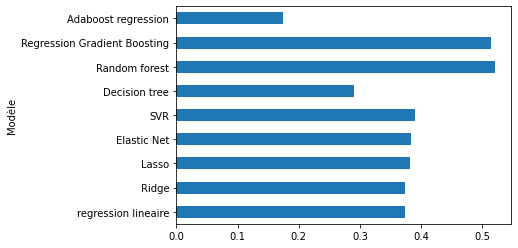

In [507]:
ax = data_scores_new['Score'].plot.barh(x='Modèle')

# ENERGYSTARScore

In [557]:
xtrain['ENERGYSTARScore'] =energy_star_score_train

C:\Users\laeti\AppData\Local\Temp/ipykernel_19960/548788695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['ENERGYSTARScore'] =energy_star_score_train


In [558]:
xtest['ENERGYSTARScore'] =energy_star_score_test

C:\Users\laeti\AppData\Local\Temp/ipykernel_19960/3221100859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtest['ENERGYSTARScore'] =energy_star_score_test


In [559]:
xtrain['TotalGHEmissions'] = ytrain
xtrain_sans_nul = xtrain['ENERGYSTARScore'].notnull()
xtrain_sans_nul_new = xtrain[xtrain_sans_nul]
ytrain = xtrain_sans_nul_new['TotalGHEmissions']
xtrain_sans_nul = xtrain_sans_nul_new.drop(['TotalGHEmissions'], axis = 1, inplace = True)

C:\Users\laeti\AppData\Local\Temp/ipykernel_19960/3628716155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['TotalGHEmissions'] = ytrain


In [561]:
xtrain = xtrain_sans_nul_new

In [563]:
xtest['TotalGHEmissions'] = ytest
xtest_sans_nul = xtest['ENERGYSTARScore'].notnull()
xtest_sans_nul_new = xtest[xtest_sans_nul]
ytest = xtest_sans_nul_new['TotalGHEmissions']
xtest_sans_nul = xtest_sans_nul_new.drop(['TotalGHEmissions'], axis = 1, inplace = True)

C:\Users\laeti\AppData\Local\Temp/ipykernel_19960/2637350372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtest['TotalGHEmissions'] = ytest
C:\Users\laeti\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [564]:
xtest = xtest_sans_nul_new

In [566]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(727, 77)
(308, 77)
(727,)
(308,)


## Amélioration ou pas du modèle

In [567]:
regr = RandomForestRegressor(max_depth = 14, max_features = 'auto', min_samples_split= 3, n_estimators= 100, random_state=0)
regr_baseline_1 = regr.fit(xtrain[features], ytrain)

In [568]:
# Evaluation du training set

ytrain_pred = regr_baseline_1.predict(xtrain_2[features])
rmse = (np.sqrt(mean_squared_error(ytrain_2, ytrain_pred)))
r2 = r2_score(ytrain_2, ytrain_pred)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
ytest_pred = regr_baseline_1.predict(xtest_2[features])
rmse = (np.sqrt(mean_squared_error(ytest_2, ytest_pred)))
r2 = r2_score(ytest_2, ytest_pred)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 232.68674981225973
le score R2 est 0.5927353823249257


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 188.17035592740285
le score R2 est 0.6360107339405111


ENERGYSTARScore améliore le modèle. 